In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
data=pd.read_csv("selling.csv")
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


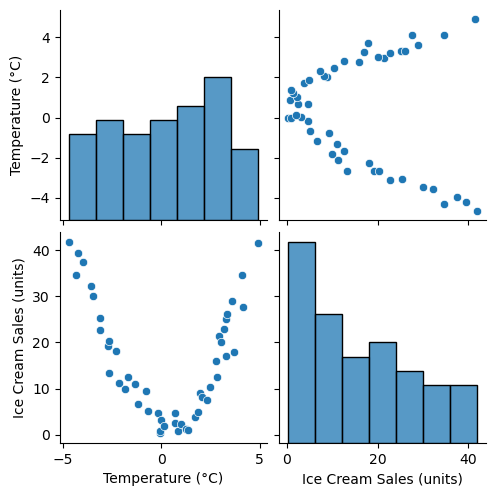

In [56]:
sns.pairplot(data)

In [57]:

data.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

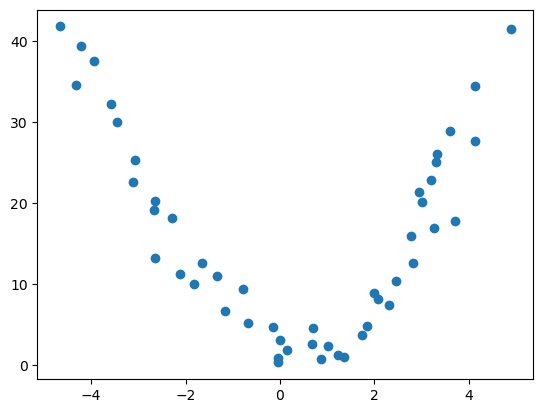

In [58]:
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'])

In [59]:
x=data[['Temperature (°C)']]
y=data['Ice Cream Sales (units)']

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [61]:
xtrain.shape

(34, 1)

In [62]:
ytrain.shape

(34,)

In [63]:
#standardisation-zscore mean=0,std=1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)


In [64]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(xtrain,ytrain)

LinearRegression()

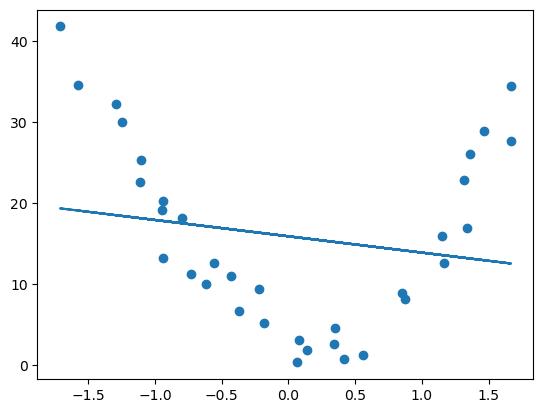

In [65]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,linear.predict(xtrain))

In [66]:
ypred=linear.predict(xtest)

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,
mean_squared_error(ytest,ypred)

191.108215579084

 

## Calculate Adjusted R-squared
## r_squared = r2_score(ytest, ypred)
## n = xtest.shape[0]  # Number of observations
## p = xtest.shape[1]  # Number of predictors
## adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# OLS

In [70]:
import statsmodels.api as sm
model=sm.OLS(ytrain,xtrain).fit()

In [71]:
model.predict(xtest)

array([-0.95328161, -1.95638687, -2.50062217, -3.95610285,  3.1060425 ,
        2.90120448, -2.72938645, -1.21338001, -3.03005594, -1.50800675,
       -1.59367912, -2.45339491, -0.13332398, -2.07522937, -0.04363142])

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Ice Cream Sales (units)   R-squared (uncentered):                   0.011
Model:                                 OLS   Adj. R-squared (uncentered):             -0.019
Method:                      Least Squares   F-statistic:                             0.3584
Date:                     Fri, 30 Aug 2024   Prob (F-statistic):                       0.553
Time:                             20:46:07   Log-Likelihood:                         -149.01
No. Observations:                       34   AIC:                                      300.0
Df Residuals:                           33   BIC:                                      301.5
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0185      3.372     -0.599      0.553      -8.878       4.841
==============================================================================
Omnibus:                        4.001   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                2.425
Skew:                           0.440   Prob(JB):                        0.297
Kurtosis:                       2.032   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Do scaler for unseen data prediction

In [75]:
linear.predict(scaler.transform([[-4.6]]))

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([19.32435024])